In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')


In [30]:
df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df[df == 0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [16]:
# Replace 0 with NaN
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)

In [ ]:
# NaN imputation with mean
df.fillna(df.mean(numeric_only=True), inplace=True)


In [ ]:
# Check for null values
df.duplicated().sum()

0

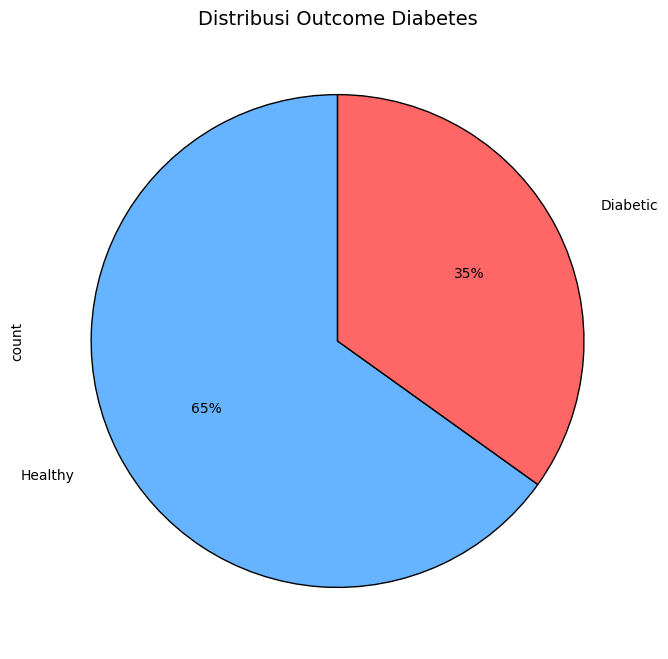

In [ ]:
# Data Visualization
labels = ["Healthy", "Diabetic"]
colors = ['#66b3ff', '#ff6666']

df['Outcome'].value_counts().plot(
    kind='pie',
    labels=labels,
    autopct='%1.0f%%',
    labeldistance=1.2,
    figsize=(8, 8),
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribusi Outcome Diabetes', fontsize=14)
plt.show()


In [26]:
# Split Data for Training and Testing
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Prediction and Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Precision (0) = 0.75 -> ckup akurat buat prediksi yg sehat
# Recall (1) = 0.50 -> model ini ga terlalu baik buat prediksi yg seharusnya, karna di prediksi 50% diabetes
# F1 Score (0) = 0.54 -> keseimbangan antara precision dan recall untuk kelas diabetes

# Conclusion
# Model lebih akurat untuk prediksi yang tidak diabetes (class/label 0) dibandingkan yang diabetes (class/label 1).
# Diabetes (Class/label 1) agak sulit di deteksi karena data yang tidak seimbang. karena memang pada umumnya lebih banyak orang yang tidak diabetes dibandingkan yang diabetes.
# Overall hasil ini cukup wajar untuk baseline Logistic Regression. 

Akurasi: 0.7012987012987013
Confusion Matrix:
 [[81 19]
 [27 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154

